In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import os

In [2]:

arrivals_df=pd.read_csv('monthly1971-2020.csv')
arrivals_df.index=arrivals_df['Month']
arrivals_df


,Month,Arrivals,Monthly_covid_cases,Terrorist_Attack_death
Month,,,,
1971-01,1971-01,5931,0,0
1971-02,1971-02,6570,0,0
1971-03,1971-03,5166,0,0
1971-04,1971-04,1539,0,0
1971-05,1971-05,952,0,0
...,...,...,...,...
2022-05,2022-05,30207,0,0
2022-06,2022-06,32856,0,0
2022-07,2022-07,47290,0,0


In [3]:
arrivals_df.describe()

,Arrivals,Monthly_covid_cases,Terrorist_Attack_death
count,621.000000,6.210000e+02,621.000000
mean,46301.677939,2.203570e+04,4.380032
std,50866.557791,2.166843e+05,37.034864
min,0.000000,0.000000e+00,0.000000
25%,17220.000000,0.000000e+00,0.000000
50%,30672.000000,0.000000e+00,0.000000
75%,45102.000000,0.000000e+00,0.000000
max,253169.000000,2.908147e+06,774.000000


In [4]:
arrivals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 621 entries, 1971-01 to 2022-09
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month                   621 non-null    object
 1   Arrivals                621 non-null    int64 
 2   Monthly_covid_cases     621 non-null    int64 
 3   Terrorist_Attack_death  621 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 24.3+ KB


Text(0.5, 1.0, 'Beore applying Normalization')

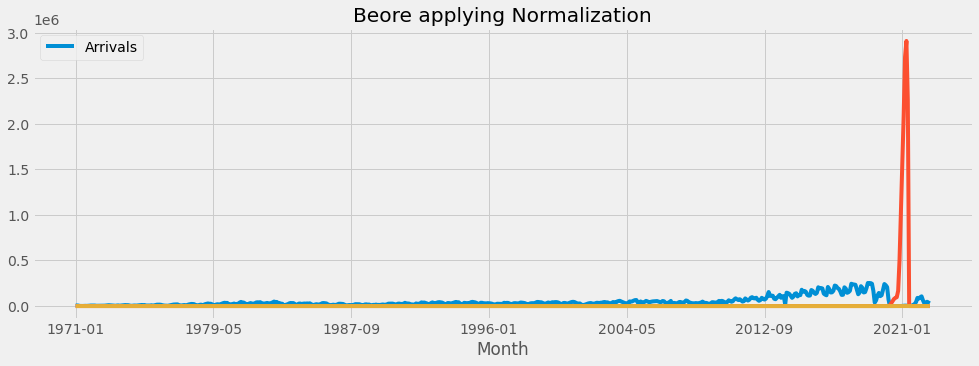

In [26]:
fig,ax=plt.subplots(figsize=(15,5))
arrivals_df.plot(ax=ax)
ax.legend(['Arrivals'])
plt.title("Beore applying Normalization")

## Running AD Fuller test to check for stationarity in data

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(arrivals_df['Arrivals'])

1. ADF :  -2.3373590484415367
2. P-Value :  0.160201796937591
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 606
5. Critical Values :
	 1% :  -3.4411869900487906
	 5% :  -2.866321181236609
	 10% :  -2.569316262893616


### P value is 0.16 which is larger than 0.05. Data is not  stationary

# Normalization

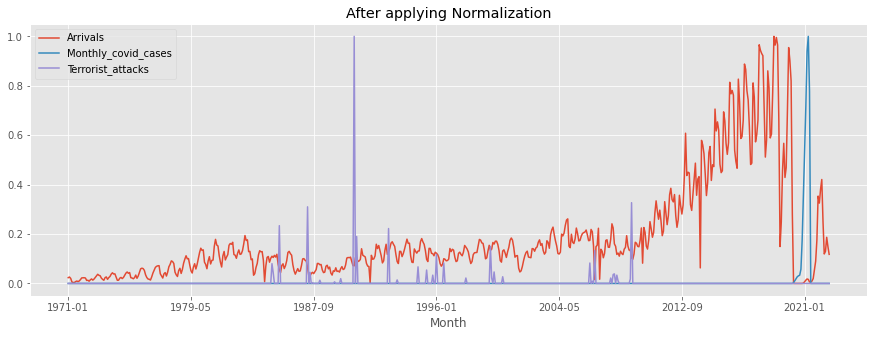

In [7]:
normalized_arrivals_df=arrivals_df.copy()

normalized_arrivals_df['Arrivals']=(arrivals_df['Arrivals']/max(arrivals_df['Arrivals']))
normalized_arrivals_df['Monthly_covid_cases']=(arrivals_df['Monthly_covid_cases']/max(arrivals_df['Monthly_covid_cases']))
normalized_arrivals_df['Terrorist_Attack_death']=(arrivals_df['Terrorist_Attack_death']/max(arrivals_df['Terrorist_Attack_death']))
# ormalized_df=(df-df.min())/(df.max()-df.min())

#after normalization
fig,ax=plt.subplots(figsize=(15,5))
plt.title("After applying Normalization")
normalized_arrivals_df['Arrivals'].plot(ax=ax)
normalized_arrivals_df['Monthly_covid_cases'].plot(ax=ax)
normalized_arrivals_df['Terrorist_Attack_death'].plot(ax=ax)
ax.legend(['Arrivals','Monthly_covid_cases','Terrorist_attacks'])


In [8]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(normalized_arrivals_df['Arrivals'])

1. ADF :  -2.337359048441525
2. P-Value :  0.16020179693759462
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 606
5. Critical Values :
	 1% :  -3.4411869900487906
	 5% :  -2.866321181236609
	 10% :  -2.569316262893616


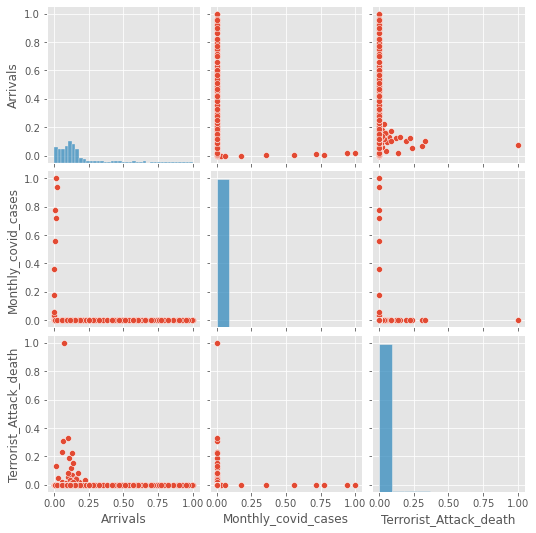

In [9]:
sns.pairplot(normalized_arrivals_df)


## Decision Tree Regressor (Multivariate Data)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
X = normalized_arrivals_df[['Monthly_covid_cases','Terrorist_Attack_death']]
y = normalized_arrivals_df['Arrivals'] # Target variable

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) # 70% training and 30% test

In [16]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [17]:
y_pred = dtr.predict(X_test)



In [18]:
df3=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df3

,Actual,Predicted
Month,,
1994-07,0.139709,0.190197
1997-05,0.088506,0.190197
2013-11,0.432201,0.190197
1994-04,0.110914,0.190197
1993-03,0.149912,0.190197
...,...,...
2020-05,0.000000,0.000000
2021-02,0.013295,0.006644
1987-06,0.030217,0.105029


<AxesSubplot:title={'center':' Decision tree Regression Actual/Predicted'}, xlabel='Month'>

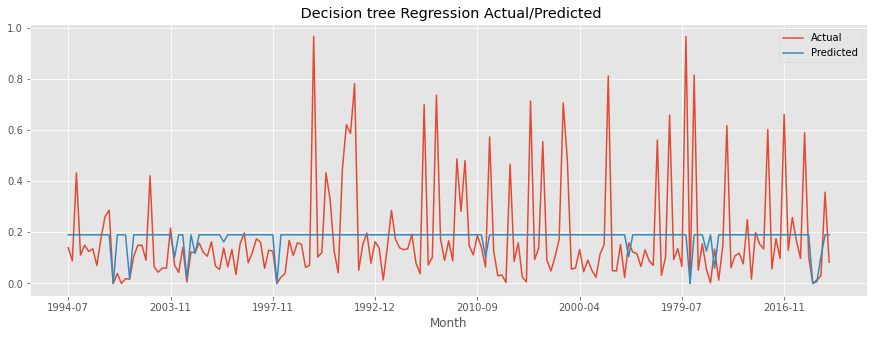

In [19]:

fig,ax=plt.subplots(figsize=(15,5))
plt.title(" Decision tree Regression Actual/Predicted")
df3.plot(ax=ax)

In [20]:
from sklearn.metrics import r2_score 
R_square = r2_score(y_test, y_pred) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.038455844601598566


In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13408667879932828
Mean Squared Error: 0.03867459405933749
Root Mean Squared Error: 0.1966585723006691


## XGboost

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

color_pal=sns.color_palette()
plt.style.use('fivethirtyeight')

In [23]:
reg=xgb.XGBRegressor(base_score=0.5,
                     booster='gbtree',
                     n_estimator=1000,
                     early_stopping_rounds=500,
                     objective='reg:linear',
                     max_depth=3,
                     learning_rate=0.01)
reg.fit(X_train,y_train,
       eval_set=[(X_train,y_train),(X_test,y_test)],
       verbose=100)


[13:09:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.37224	validation_1-rmse:0.37361
[99]	validation_0-rmse:0.23116	validation_1-rmse:0.22986


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=500, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimator=1000, n_estimators=100,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear', ...)

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13408667879932828
Mean Squared Error: 0.03867459405933749
Root Mean Squared Error: 0.1966585723006691
